# New Section

In [8]:
#Import the libraries
import pandas
import numpy
from collections import OrderedDict
import seaborn
import matplotlib.pyplot as plt
from tabulate import tabulate, tabulate_formats


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
data = pandas.read_csv('CodebookGap.csv', low_memory=False, 
            skip_blank_lines=True, usecols=['country','incomeperperson', 'alcconsumption', 'lifeexpectancy'])

In [ ]:
data.columns=['country', 'income', 'alcohol', 'life']
'''
# Variables Descriptions
alcohol = "2008 alcohol consumption per adult (liters, age 15+)"
income = "2010 Gross Domestic Product per capita in constant 2000 US$"
life = "2011 life expectancy at birth (years)"'''
data.info()
for dt in ('income','alcohol','life') :
    data[dt] = pandas.to_numeric(data[dt], errors='coerce')
data.info()

In [ ]:
nullLabels =data[data.country.isnull() | data.income.isnull() | data.alcohol.isnull() | data.life.isnull()]
print(nullLabels)
data = data.dropna(axis=0, how='any')
print (data.info())

In [42]:
minMax = OrderedDict()
dict1 = OrderedDict()

dict1['min'] = data.life.min()
dict1['max'] = data.life.max()
minMax['life'] = dict1

dict2 = OrderedDict()
dict2['min'] = data.income.min()
dict2['max'] = data.income.max()
minMax['income'] = dict2

dict3 = OrderedDict()
dict3['min'] = data.alcohol.min()
dict3['max'] = data.alcohol.max()
minMax['alcohol'] = dict3

df = pandas.DataFrame([minMax['income'],minMax['life'],minMax['alcohol']], index = ['Income','Life','Alcohol'])
print (df.sort_index(axis=1, ascending=False))

dummyData = data.copy()
 # Maps
income_map = {1: '>=100  <5k', 2: '>=5k <10k', 3: '>=10k <20k',
               4: '>=20K <30K', 5: '>=30K <40K', 6: '>=40K <50K' }
life_map = {1: '>=40 <50', 2: '>=50 <60', 3: '>=60 <70', 4: '>=70 <80', 5: '>=80 <90'}
alcohol_map = {1: '>=0.5 <5', 2: '>=5 <10', 3: '>=10 <15', 4: '>=15 <20', 5: '>=20 <25'}

dummyData['income'] = pandas.cut(data.income,[100,5000,10000,20000,30000,40000,50000], labels=['1','2','3','4','5','6'])
print(dummyData.head(10))

dummyData['life'] = pandas.cut(data.life,[40,50,60,70,80,90], labels=['1','2','3','4','5'])
print(dummyData.head(10))

dummyData['alcohol'] = pandas.cut(data.alcohol,[0.5,5,10,15,20,25], labels=['1','2','3','4','5'])
print (dummyData.head(10))


                min           max
Income   103.775857  52301.587179
Life      47.794000     83.394000
Alcohol    0.050000     23.010000
       country income  alcohol    life
1      Albania      1     7.29  76.918
2      Algeria      1     0.69  73.131
4       Angola      1     5.57  51.093
6    Argentina      3     9.35  75.901
7      Armenia      1    13.66  74.241
9    Australia      4    10.21  81.907
10     Austria      4    12.40  80.854
11  Azerbaijan      1    13.34  70.739
12     Bahamas      3     8.65  75.620
13     Bahrain      3     4.19  75.057
       country income  alcohol life
1      Albania      1     7.29    4
2      Algeria      1     0.69    4
4       Angola      1     5.57    2
6    Argentina      3     9.35    4
7      Armenia      1    13.66    4
9    Australia      4    10.21    5
10     Austria      4    12.40    5
11  Azerbaijan      1    13.34    4
12     Bahamas      3     8.65    4
13     Bahrain      3     4.19    4
       country income alcohol life
1   

In [43]:
c2 = dummyData['income'].value_counts(sort=False)
p2 = dummyData['income'].value_counts(sort=False, normalize=True)

c3 = dummyData['alcohol'].value_counts(sort=False)
p3 = dummyData['alcohol'].value_counts(sort=False, normalize=True)

c4 = dummyData['life'].value_counts(sort=False)
p4 = dummyData['life'].value_counts(sort=False, normalize=True)

print("****************************************************")
print("*************Absolute Frequency********************") 
print("Income Per Person:")
print("Income-Freq")
print(c2)
print("Alcohol Consumption:")
print("Alcohol-Freq")
print(c3)
print("Life Expecectancy:")
print("Life-Freq")
print(c4)

print("****************************************************")
print("*************Relative Frequency********************") 
print("Income Per Person:")
print("Income- Freq")
print(p2)
print("Alcohol Consumption:")
print("Alcohol-Freq")
print(p3)
print("Life Expecectancy:")
print("Life-Freq")
print(p4)

****************************************************
*************Absolute Frequency********************
Income Per Person:
Income-Freq
1    110
2     24
3     15
4     12
5      9
6      0
Name: income, dtype: int64
Alcohol Consumption:
Alcohol-Freq
1    63
2    56
3    31
4    10
5     1
Name: alcohol, dtype: int64
Life Expecectancy:
Life-Freq
1     8
2    28
3    35
4    80
5    20
Name: life, dtype: int64
****************************************************
*************Relative Frequency********************
Income Per Person:
Income- Freq
1    0.647059
2    0.141176
3    0.088235
4    0.070588
5    0.052941
6    0.000000
Name: income, dtype: float64
Alcohol Consumption:
Alcohol-Freq
1    0.391304
2    0.347826
3    0.192547
4    0.062112
5    0.006211
Name: alcohol, dtype: float64
Life Expecectancy:
Life-Freq
1    0.046784
2    0.163743
3    0.204678
4    0.467836
5    0.116959
Name: life, dtype: float64


Text(0.5, 1.0, '2010 Gross Domestic Product per capita in constant 2000 US$')

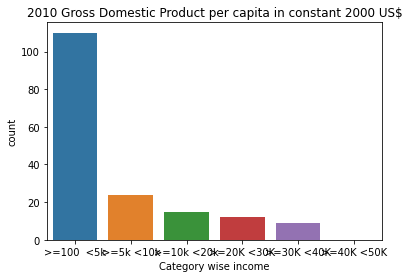

In [50]:
# Univariante graph of Income(cetegorical)
dummyData["income"] = dummyData["income"].astype('category')
dummyData["income"] = dummyData["income"].cat.rename_categories([i for i in income_map.values()])

seaborn.countplot(x="income", data=dummyData)
plt.xlabel('Category wise income')
plt.title('2010 Gross Domestic Product per capita in constant 2000 US$')

Text(0.5, 1.0, '2008 alcohol consumption per adult (liters, age 15+)')

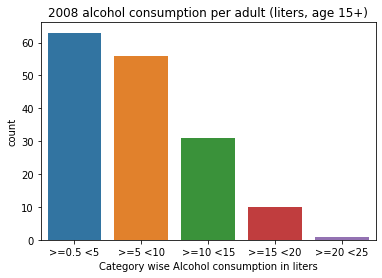

In [51]:
# Univariante graph of Alcohol(cetegorical)
dummyData['alcohol'] = dummyData["alcohol"].astype('category')
dummyData["alcohol"] = dummyData["alcohol"].cat.rename_categories([i for i in alcohol_map.values()])

seaborn.countplot(x="alcohol", data=dummyData)
plt.xlabel('Category wise Alcohol consumption in liters')
plt.title('2008 alcohol consumption per adult (liters, age 15+)')

Text(0.5, 1.0, '2011 life expectancy at birth (years)')

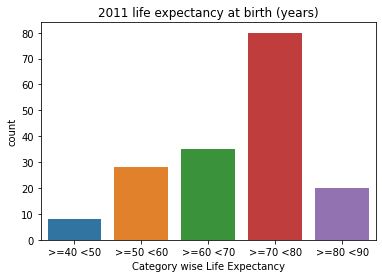

In [52]:
# Univariante graph of Life Expectancy(cetegorical)
dummyData['life'] = dummyData['life'].astype('category')
dummyData["life"] = dummyData["life"].cat.rename_categories([i for i in life_map.values()])

seaborn.countplot(x="life", data=dummyData)
plt.xlabel('Category wise Life Expectancy')
plt.title('2011 life expectancy at birth (years)')

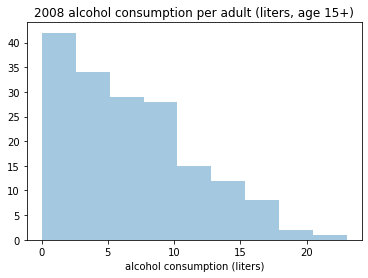

count    171.000000
mean       6.784094
std        4.951446
min        0.050000
25%        2.725000
50%        5.920000
75%        9.990000
max       23.010000
Name: alcohol, dtype: float64


In [44]:
#Univarient graph for alcohol consumption
seaborn.distplot(data["alcohol"].dropna(), kde=False);
plt.xlabel('alcohol consumption (liters)')
plt.title('2008 alcohol consumption per adult (liters, age 15+)')
plt.show()

#Information about alcohol variable
dis = data["alcohol"].describe()
print (dis)

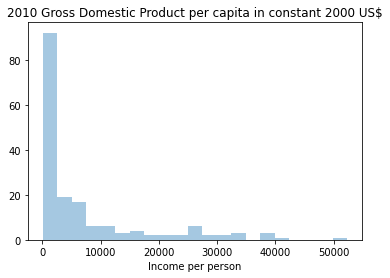

count      171.000000
mean      7006.359798
std      10264.774835
min        103.775857
25%        639.452655
50%       2231.993335
75%       7633.390394
max      52301.587179
Name: income, dtype: float64


In [45]:
#Univarient graph for Income per person
seaborn.distplot(data["income"].dropna(), kde=False);
plt.xlabel('Income per person')
plt.title('2010 Gross Domestic Product per capita in constant 2000 US$')
plt.show()

#Information about alcohol variable
dis = data["income"].describe()
print (dis)

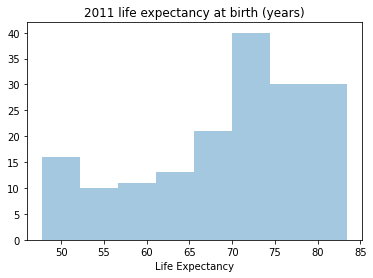

count    171.000000
mean      69.385737
std        9.728238
min       47.794000
25%       62.747000
50%       72.974000
75%       76.099000
max       83.394000
Name: life, dtype: float64


In [46]:
#Univarient graph for Life Expectancy
seaborn.distplot(data["life"].dropna(), kde=False);
plt.xlabel('Life Expectancy')
plt.title('2011 life expectancy at birth (years)')
plt.show()

#Information about alcohol variable
dis = data["life"].describe()
print (dis)

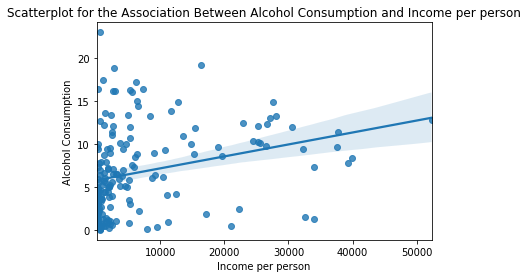

In [47]:
# basic scatterplot Q->Q
scatplot = seaborn.regplot(x="income", y="alcohol", fit_reg=True, data=data)
plt.xlabel('Income per person')
plt.ylabel('Alcohol Consumption')
plt.title('Scatterplot for the Association Between Alcohol Consumption and Income per person')
plt.show()

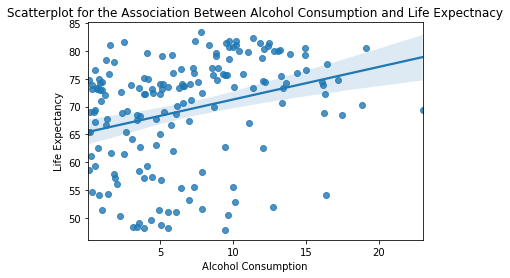

In [49]:
# basic scatterplot Q->Q
scatplot = seaborn.regplot(x="alcohol", y="life", fit_reg=True, data=data)
plt.xlabel('Alcohol Consumption')
plt.ylabel('Life Expectancy')
plt.title('Scatterplot for the Association Between Alcohol Consumption and Life Expectnacy')
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


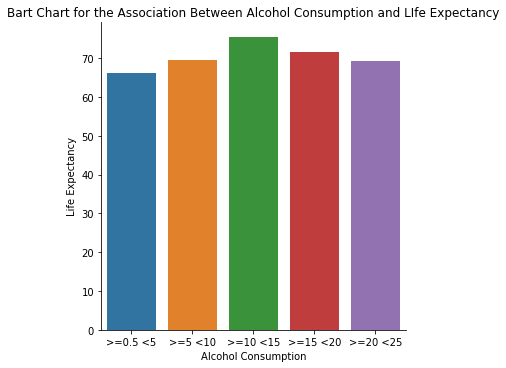

In [54]:

# bivariate bar graph C->C
dummyData['life'] = data['life']

seaborn.factorplot(x='alcohol', y='life', data=dummyData, kind="bar", ci=None)
plt.xlabel('Alcohol Consumption in liters')
plt.ylabel('Life Expectancy')
plt.title('Bart Chart for the Association Between Alcohol Consumption and LIfe Expectancy')
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


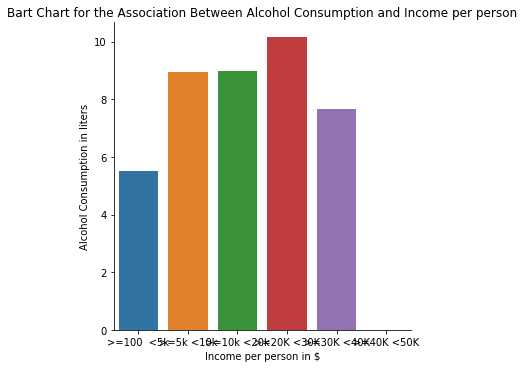

In [55]:
dummyData['alcohol'] = data['alcohol']

seaborn.factorplot(x='income', y='alcohol', data=dummyData, kind="bar", ci=None)
plt.xlabel('Income per person in $')
plt.ylabel('Alcohol Consumption in liters')
plt.title('Bart Chart for the Association Between Alcohol Consumption and Income per person')
plt.show()